In [9]:
from pandas_datareader import data, wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [13]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
source = 'google'

In [140]:
#BAC = Bank of America
BAC = data.DataReader("BAC", source, start, end)
#C = Citibank
C = data.DataReader("C", source, '01/01/2006', '01/01/2016')
#GS = Goldman Sachs
GS = data.DataReader("GS", source, '01/01/2006', '01/01/2016')
#JPM = JP Morgan Chase
JPM = data.DataReader("JPM", source, '01/01/2006', '01/01/2016')
#MS = Morgan Stanley
MS = data.DataReader("MS", source, '01/01/2006', '01/01/2016')
#WFC = Wells Fargo
WFC = data.DataReader("WFC", source, '01/01/2006', '01/01/2016')

In [18]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [19]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1, keys=tickers)

In [23]:
bank_stocks.columns.names=['Bank Ticker', 'Stock Info']

In [25]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [30]:
bank_stocks.xs('Close', axis = 1, level ='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [32]:
returns = pd.DataFrame()

In [37]:
len(bank_stocks.xs('Close', axis=1, level= 'Stock Info'))

2517

In [70]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


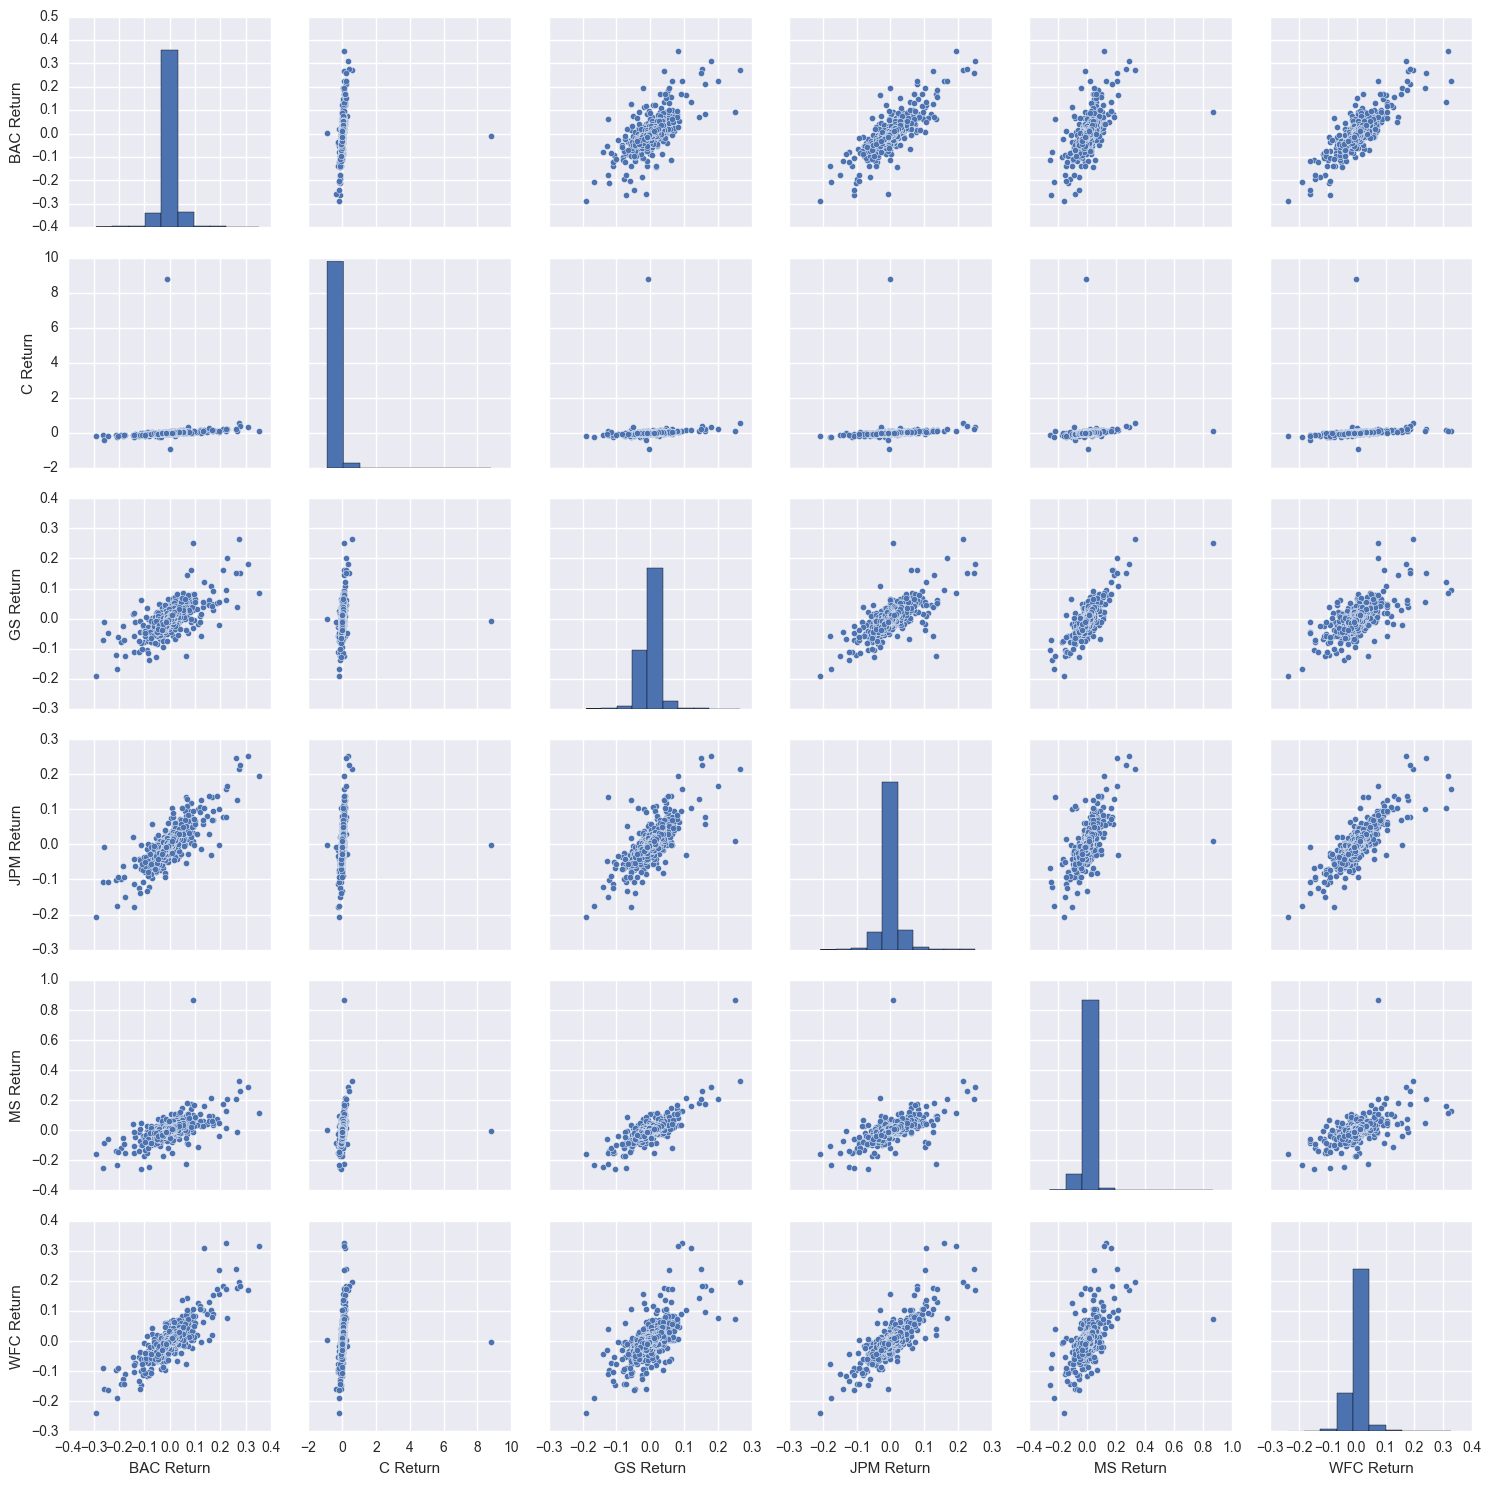

In [74]:
import seaborn as sns

sns.pairplot(returns[1:])

In [82]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [84]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [86]:
returns.ix['01-01-2015':'12-31-2015'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

/Users/raymondjolly/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


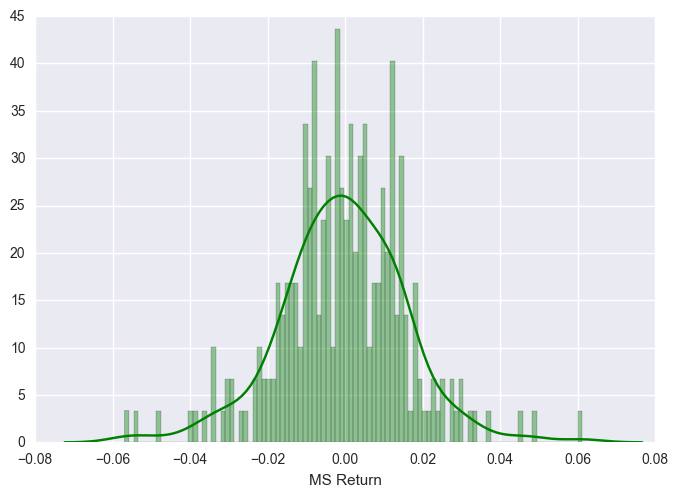

In [93]:
sns.distplot(returns.ix['01-01-2015':'12-31-2015']['MS Return'],bins=100, color='green')

/Users/raymondjolly/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


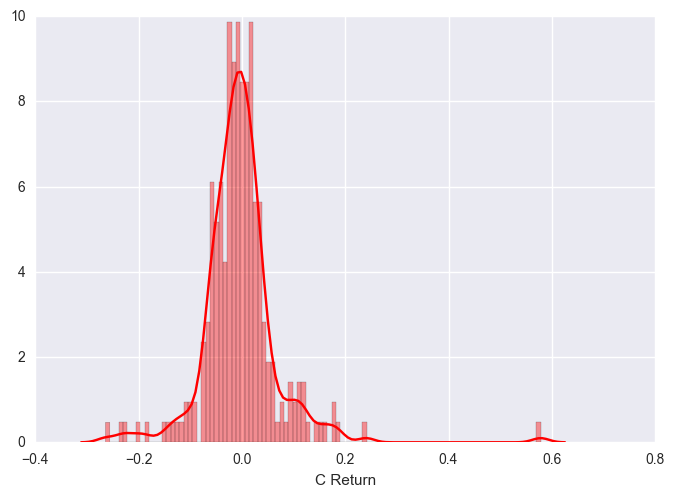

In [94]:
sns.distplot(returns.ix['01-01-2008':'12-31-2008']['C Return'],bins=100, color='red')

In [115]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [116]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

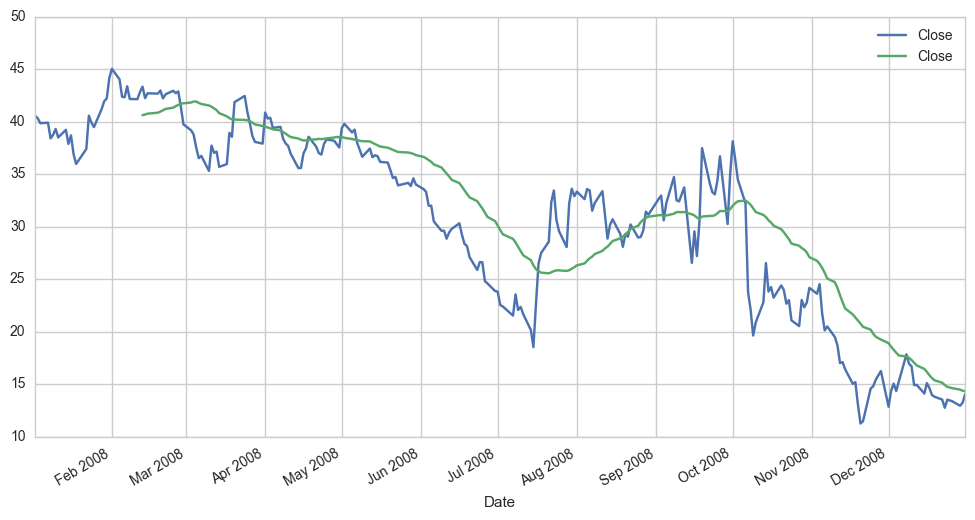

In [117]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['01-01-2008':'12-31-2008'].plot()
BAC['Close'].ix['01-01-2008':'12-31-2008'].rolling(window=30).mean().plot()
plt.legend()

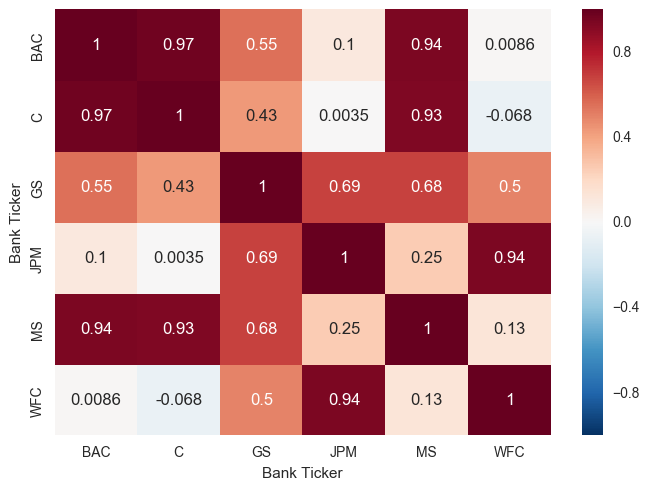

In [146]:
sns.heatmap(bank_stocks.xs(key='Close', axis = 1, level='Stock Info').corr(), annot=True)


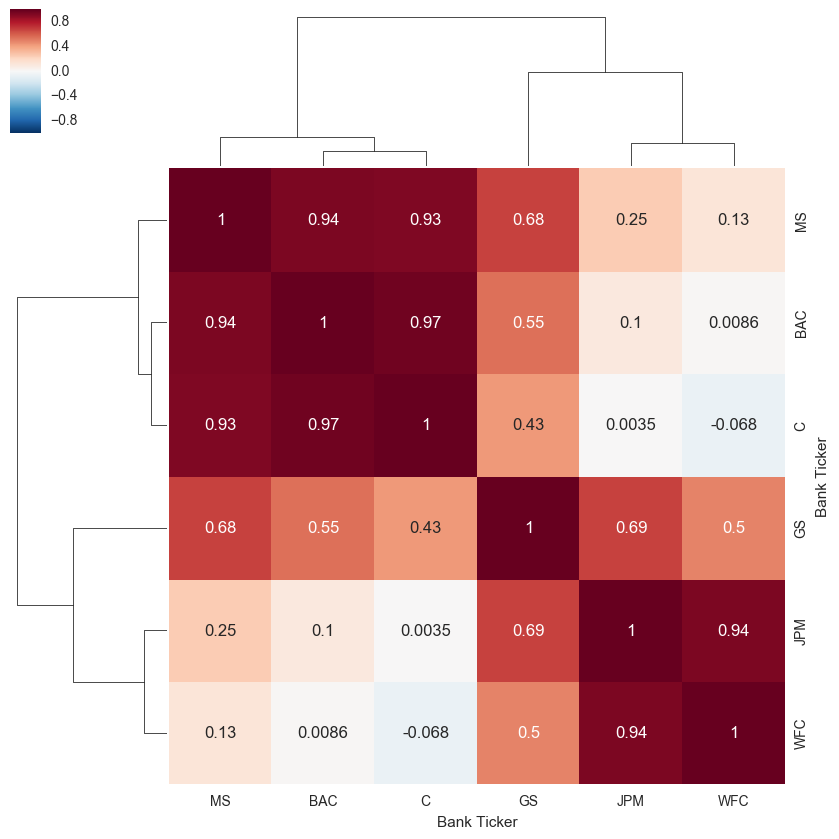

In [147]:
sns.clustermap(bank_stocks.xs(key='Close', axis = 1, level='Stock Info').corr(), annot=True)

In [139]:
BAC[['Close', 'Open', 'High', 'Low']].ix['01-01-2015':'01-01-2016'].iplot(kind='candle')

In [152]:
close_corr = bank_stocks.xs(key='Close', axis = 1, level='Stock Info').corr()

In [153]:
close_corr.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
